<a href="https://colab.research.google.com/github/ragavan11/diabetes-prediction-system/blob/main/Phase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from numpy.matrixlib.defmatrix import matrix
warnings.filterwarnings('ignore')

In [ ]:
# Define a list of relevant features
relevant_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']

# Subset the dataset to include relevant features
diabetes_dataset = pd.read_csv('diabetes.csv')
dataset = diabetes_dataset

diabetes_dataset = diabetes_dataset[relevant_features + ['Outcome']]

diabetes_dataset.duplicated()

X = diabetes_dataset[relevant_features]
Y = diabetes_dataset['Outcome']


In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Glucose,BloodPressure,BMI,Age,Outcome
0,148,72,33.6,50,1
1,85,66,26.6,31,0
2,183,64,23.3,32,1
3,89,66,28.1,21,0
4,137,40,43.1,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape
print(diabetes_dataset.info())  # Get information about data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    int64  
 1   BloodPressure  768 non-null    int64  
 2   BMI            768 non-null    float64
 3   Age            768 non-null    int64  
 4   Outcome        768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB
None


In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Glucose,BloodPressure,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,31.992578,33.240885,0.348958
std,31.972618,19.355807,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,62.000000,27.300000,24.000000,0.000000
50%,117.000000,72.000000,32.000000,29.000000,0.000000
75%,140.250000,80.000000,36.600000,41.000000,1.000000
max,199.000000,122.000000,67.100000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(diabetes_dataset)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
na_cols = missing_values_table(diabetes_dataset, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Glucose,BloodPressure,BMI,Age
Outcome,,,,
0,109.980000,68.184000,30.304200,31.190000
1,141.257463,70.824627,35.142537,37.067164


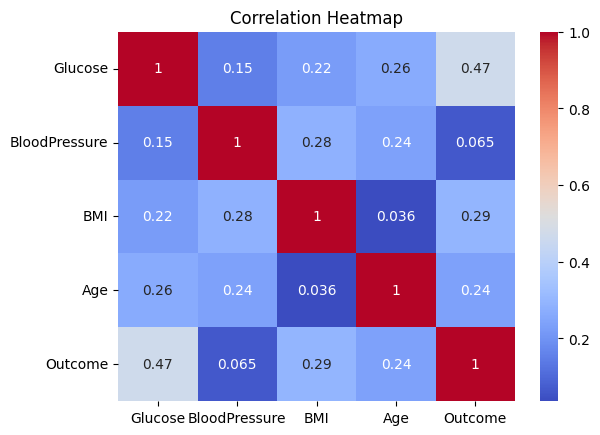

In [ ]:
correlation_matrix = diabetes_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
# Categorical columns
cat_col = [col for col in diabetes_dataset.columns if diabetes_dataset[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in diabetes_dataset.columns if diabetes_dataset[col].dtype != 'object']
print('Numerical columns :',num_col)

diabetes_dataset[cat_col].nunique()

Categorical columns : []
Numerical columns : ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']


Series([], dtype: float64)

In [ ]:
round((diabetes_dataset.isnull().sum()/diabetes_dataset.shape[0])*100,2)

Glucose          0.0
BloodPressure    0.0
BMI              0.0
Age              0.0
Outcome          0.0
dtype: float64

In [ ]:
# calculate summary statistics
mean = diabetes_dataset['Age'].mean()
std = diabetes_dataset['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = diabetes_dataset[(diabetes_dataset['Age'] >= lower_bound)
				& (diabetes_dataset['Age'] <= upper_bound)]

Lower Bound : 9.720422335309294
Upper Bound : 56.761348498024034


In [ ]:
print(X)
print(Y)

     Glucose  BloodPressure   BMI  Age
0        148             72  33.6   50
1         85             66  26.6   31
2        183             64  23.3   32
3         89             66  28.1   21
4        137             40  43.1   33
..       ...            ...   ...  ...
763      101             76  32.9   63
764      122             70  36.8   27
765      121             72  26.2   30
766      126             60  30.1   47
767       93             70  30.4   23

[768 rows x 4 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)
X = standardized_data
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

[[ 0.84832379  0.14964075  0.20401277  1.4259954 ]
 [-1.12339636 -0.16054575 -0.68442195 -0.19067191]
 [ 1.94372388 -0.26394125 -1.10325546 -0.10558415]
 ...
 [ 0.00330087  0.14964075 -0.73518964 -0.27575966]
 [ 0.1597866  -0.47073225 -0.24020459  1.17073215]
 [-0.8730192   0.04624525 -0.20212881 -0.87137393]]
[[ 0.84832379  0.14964075  0.20401277  1.4259954 ]
 [-1.12339636 -0.16054575 -0.68442195 -0.19067191]
 [ 1.94372388 -0.26394125 -1.10325546 -0.10558415]
 ...
 [ 0.00330087  0.14964075 -0.73518964 -0.27575966]
 [ 0.1597866  -0.47073225 -0.24020459  1.17073215]
 [-0.8730192   0.04624525 -0.20212881 -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
# Make predictions on the training and testing sets
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

# Calculate accuracy scores
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)
test_data_accuracy = accuracy_score(Y_test_pred, Y_test)

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Create a bar chart to visualize accuracies
accuracies = [training_data_accuracy, test_data_accuracy]
labels = ['Training Data', 'Test Data']


(768, 4) (614, 4) (154, 4)
Accuracy score of the training data :  0.7719869706840391


In [ ]:
model=SVC()
model.fit(X_train , Y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


In [ ]:
# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Define a parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver algorithm
}
# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search.fit(X, Y)

# Print the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy: 0.7734742381801205


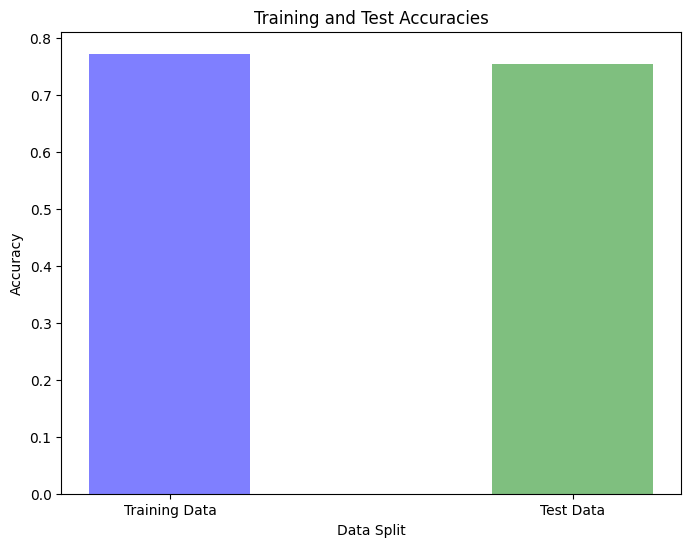

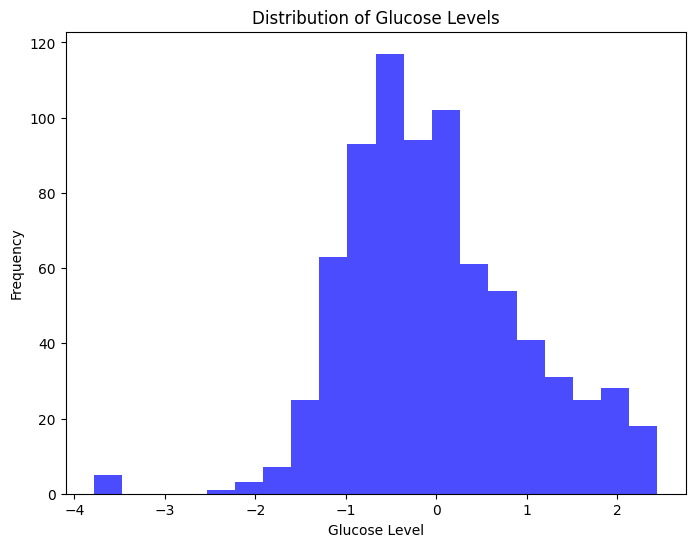

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, width=0.4, align='center', alpha=0.5, color=['blue', 'green'])
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies')
plt.show()

# Data visualization section: Histogram of the "Glucose" feature
plt.figure(figsize=(8, 6))
plt.hist(X[:, 0], bins=20, color='blue', alpha=0.7)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels')

plt.show()

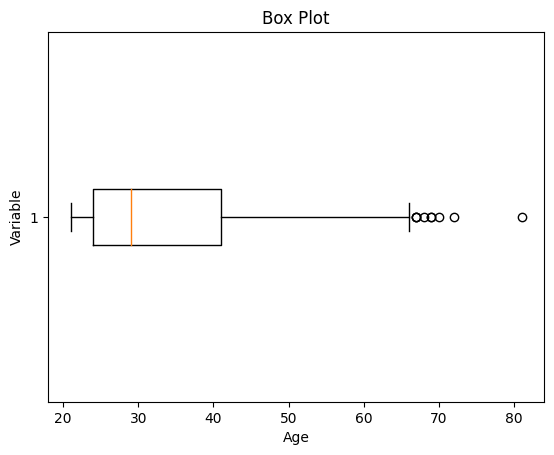

In [ ]:
plt.boxplot(diabetes_dataset['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

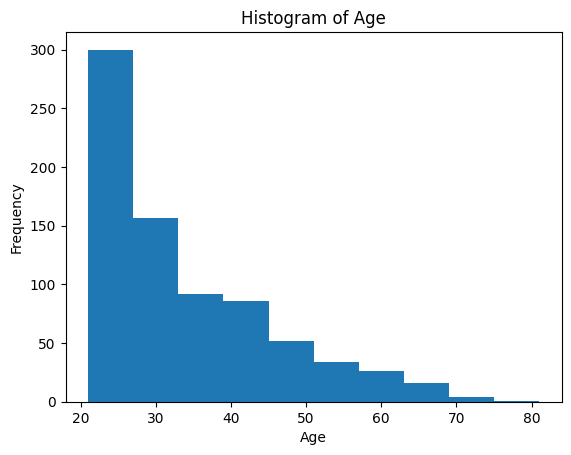

In [ ]:
diabetes_dataset['Age'].plot.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

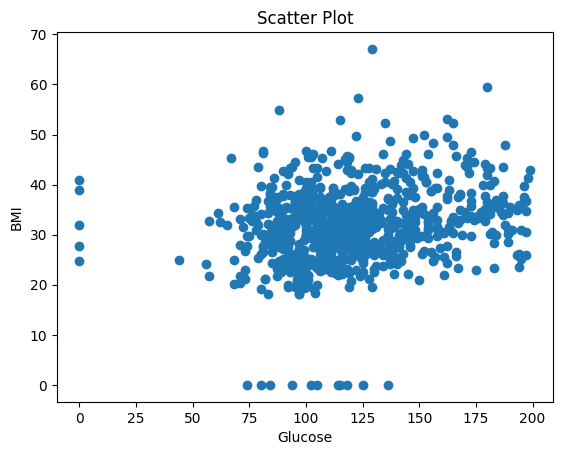

In [ ]:
plt.scatter(diabetes_dataset['Glucose'], diabetes_dataset['BMI'])
plt.title('Scatter Plot')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X, Y)

# Print the best hyperparameters and their corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:", best_score)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy on Test Data: 0.7708683473389355


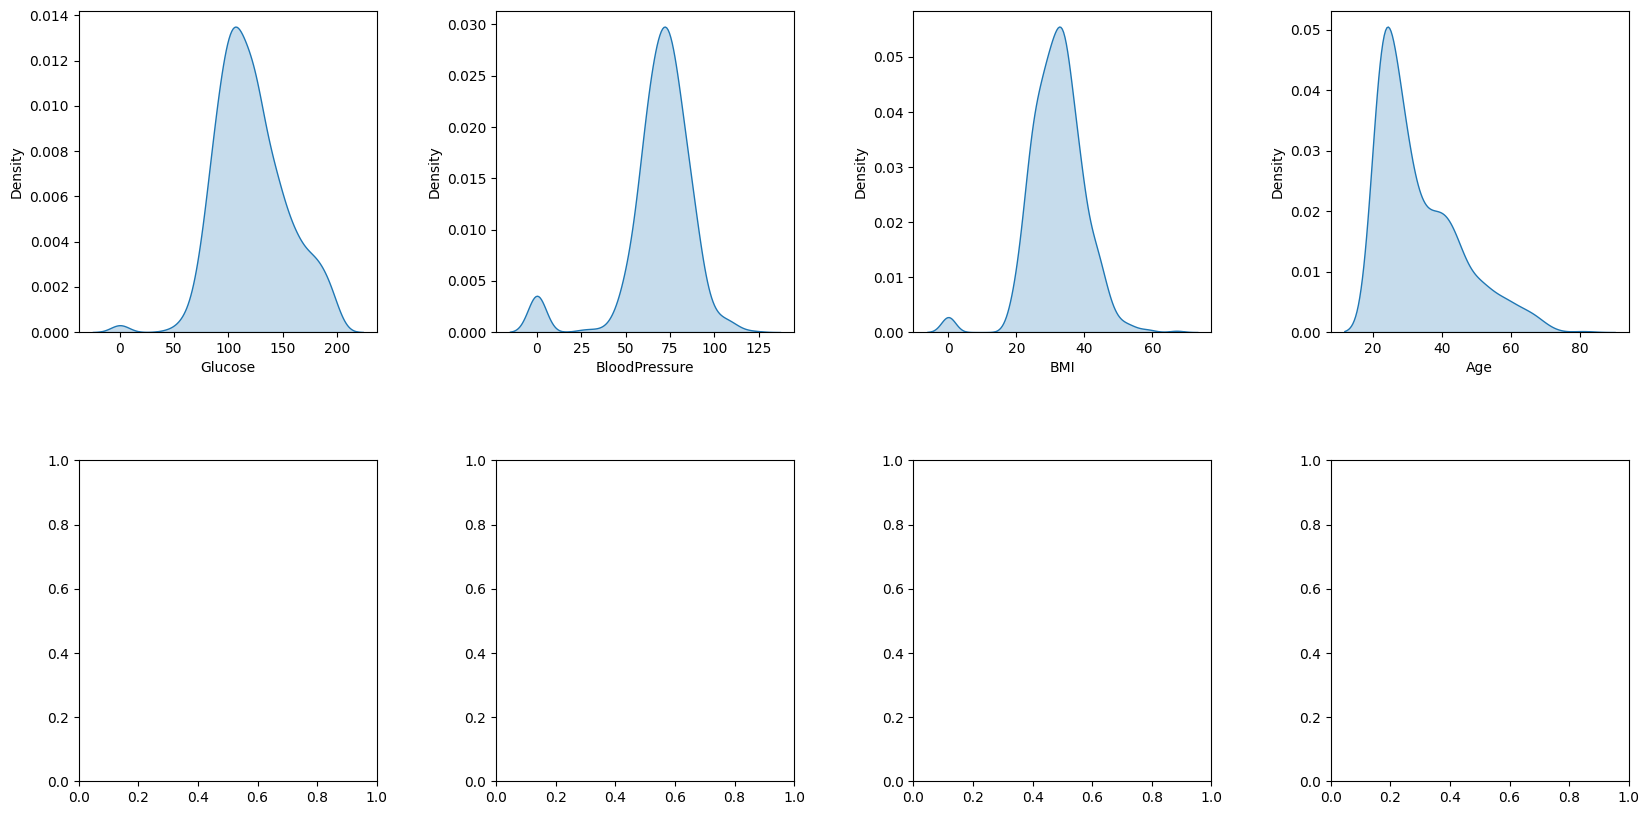

In [ ]:
# Visualizing Kernel Density Estimator for each feature
features = diabetes_dataset.columns[:-1]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

for i, feature in enumerate(features):
    sns.kdeplot(diabetes_dataset[feature], ax=axes[i//4, i%4],shade='fill')

plt.show()


In [ ]:
# Make predictions on a sample input data point
input_data = np.array([148,72,33.6,50]).reshape(1, -1)
input_data = scaler.transform(input_data)
prediction = classifier.predict(input_data)

print('Accuracy score of the test data : ', test_data_accuracy)
input_data = (148,72,33.6,50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Accuracy score of the test data :  0.7532467532467533
[[0.84832379 0.14964075 0.20401277 1.4259954 ]]
[1]
The person is diabetic


In [ ]:
# Number of synthetic samples to generate
num_samples_to_generate = 500

# Initialize lists to store synthetic data
synthetic_data = []
synthetic_labels = []

for _ in range(num_samples_to_generate):
    # Randomly select an index from the real data
    random_index = np.random.randint(0, len(X))

    # Select a real data point and its label
    real_data_point = X[random_index]
    real_label = Y[random_index]

    # Create a slightly modified version of the real data point
    modified_data_point = real_data_point + np.random.normal(0, 0.1, size=real_data_point.shape)

    # Append the modified data point and its label to the synthetic data
    synthetic_data.append(modified_data_point)
    synthetic_labels.append(real_label)

# Combine real and synthetic data
X_synthetic = np.vstack([X, np.array(synthetic_data)])
Y_synthetic = np.concatenate([Y, np.array(synthetic_labels)])

# Print the first 5 samples of the synthetic data
print("Synthetic Data (X_synthetic):")
print(X_synthetic[:5])

# Print the corresponding labels for the first 5 samples
print("Synthetic Labels (Y_synthetic):")
print(Y_synthetic[:5])

Synthetic Data (X_synthetic):
[[ 0.84832379  0.14964075  0.20401277  1.4259954 ]
 [-1.12339636 -0.16054575 -0.68442195 -0.19067191]
 [ 1.94372388 -0.26394125 -1.10325546 -0.10558415]
 [-0.99820778 -0.16054575 -0.49404308 -1.04154944]
 [ 0.5040552  -1.50468724  1.4097456  -0.0204964 ]]
Synthetic Labels (Y_synthetic):
[1 0 1 0 1]


In [ ]:
# Make predictions on the test set
Y_test_pred = classifier.predict(X_test)
# Calculate various performance metrics
accuracy = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)

In [ ]:
# Calculate various performance metrics
accuracy = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)

# Calculate ROC-AUC score and plot ROC curve
y_scores = classifier.decision_function(X_test)
roc_auc = roc_auc_score(Y_test, y_scores)
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

Accuracy: 0.75
Precision: 0.72
Recall: 0.48
F1 Score: 0.58
ROC-AUC Score: 0.78
Classification Report is:               precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.72      0.48      0.58        54

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154

Confusion matrix is: [[90 10]
 [28 26]]


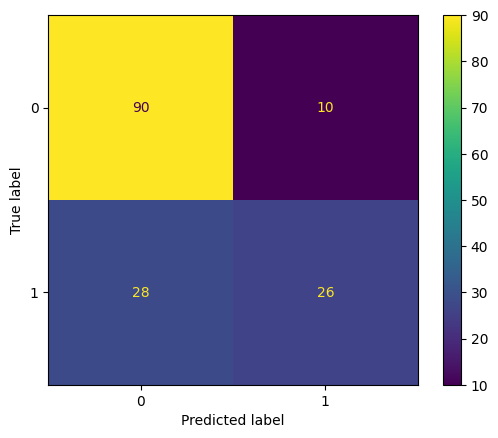

In [ ]:
# Print the performance metrics confusion matrix
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC-AUC Score: {:.2f}".format(roc_auc))
print("Classification Report is:",classification_report(Y_test, Y_test_pred))
cm=confusion_matrix(Y_test, Y_test_pred)
print("Confusion matrix is:",cm)
color = 'white'
matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
matrix.plot()
plt.show()


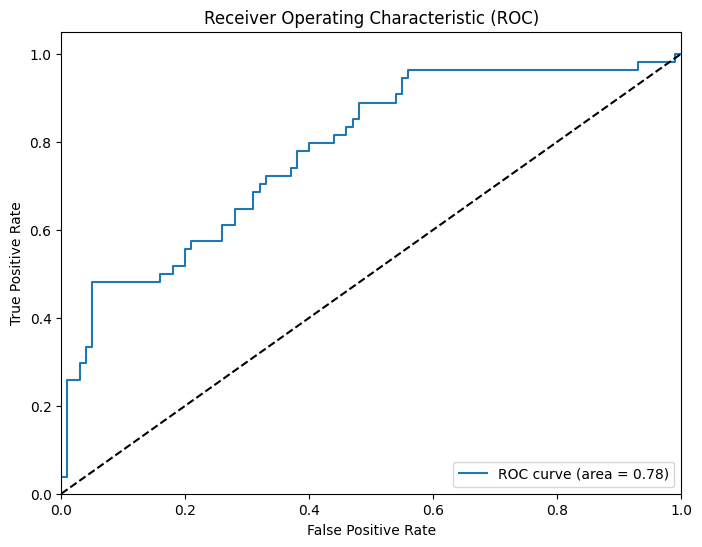

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
print(confusion_matrix(y_test, gbc.predict(x_test)))

[[111  19]
 [ 22  40]]


In [ ]:
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test, gbc.predict(x_test)))

In [ ]:
pred=gbc.predict(x_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       130
           1       0.68      0.65      0.66        62

    accuracy                           0.79       192
   macro avg       0.76      0.75      0.75       192
weighted avg       0.78      0.79      0.79       192



In [ ]:
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

In [ ]:
gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(x_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(x_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Score: 0.7482638888888888
Test Score: 0.8125


In [ ]:
grid = {
    'max_depth':[2,3,4,5,6,7],
}

In [ ]:
gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(x_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(x_test,y_test))

Best Parameters: {'max_depth': 3}
Train Score: 0.7465277777777777
Test Score: 0.8125
